### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [6]:
df = pd.read_csv('USA_Housing.csv')

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


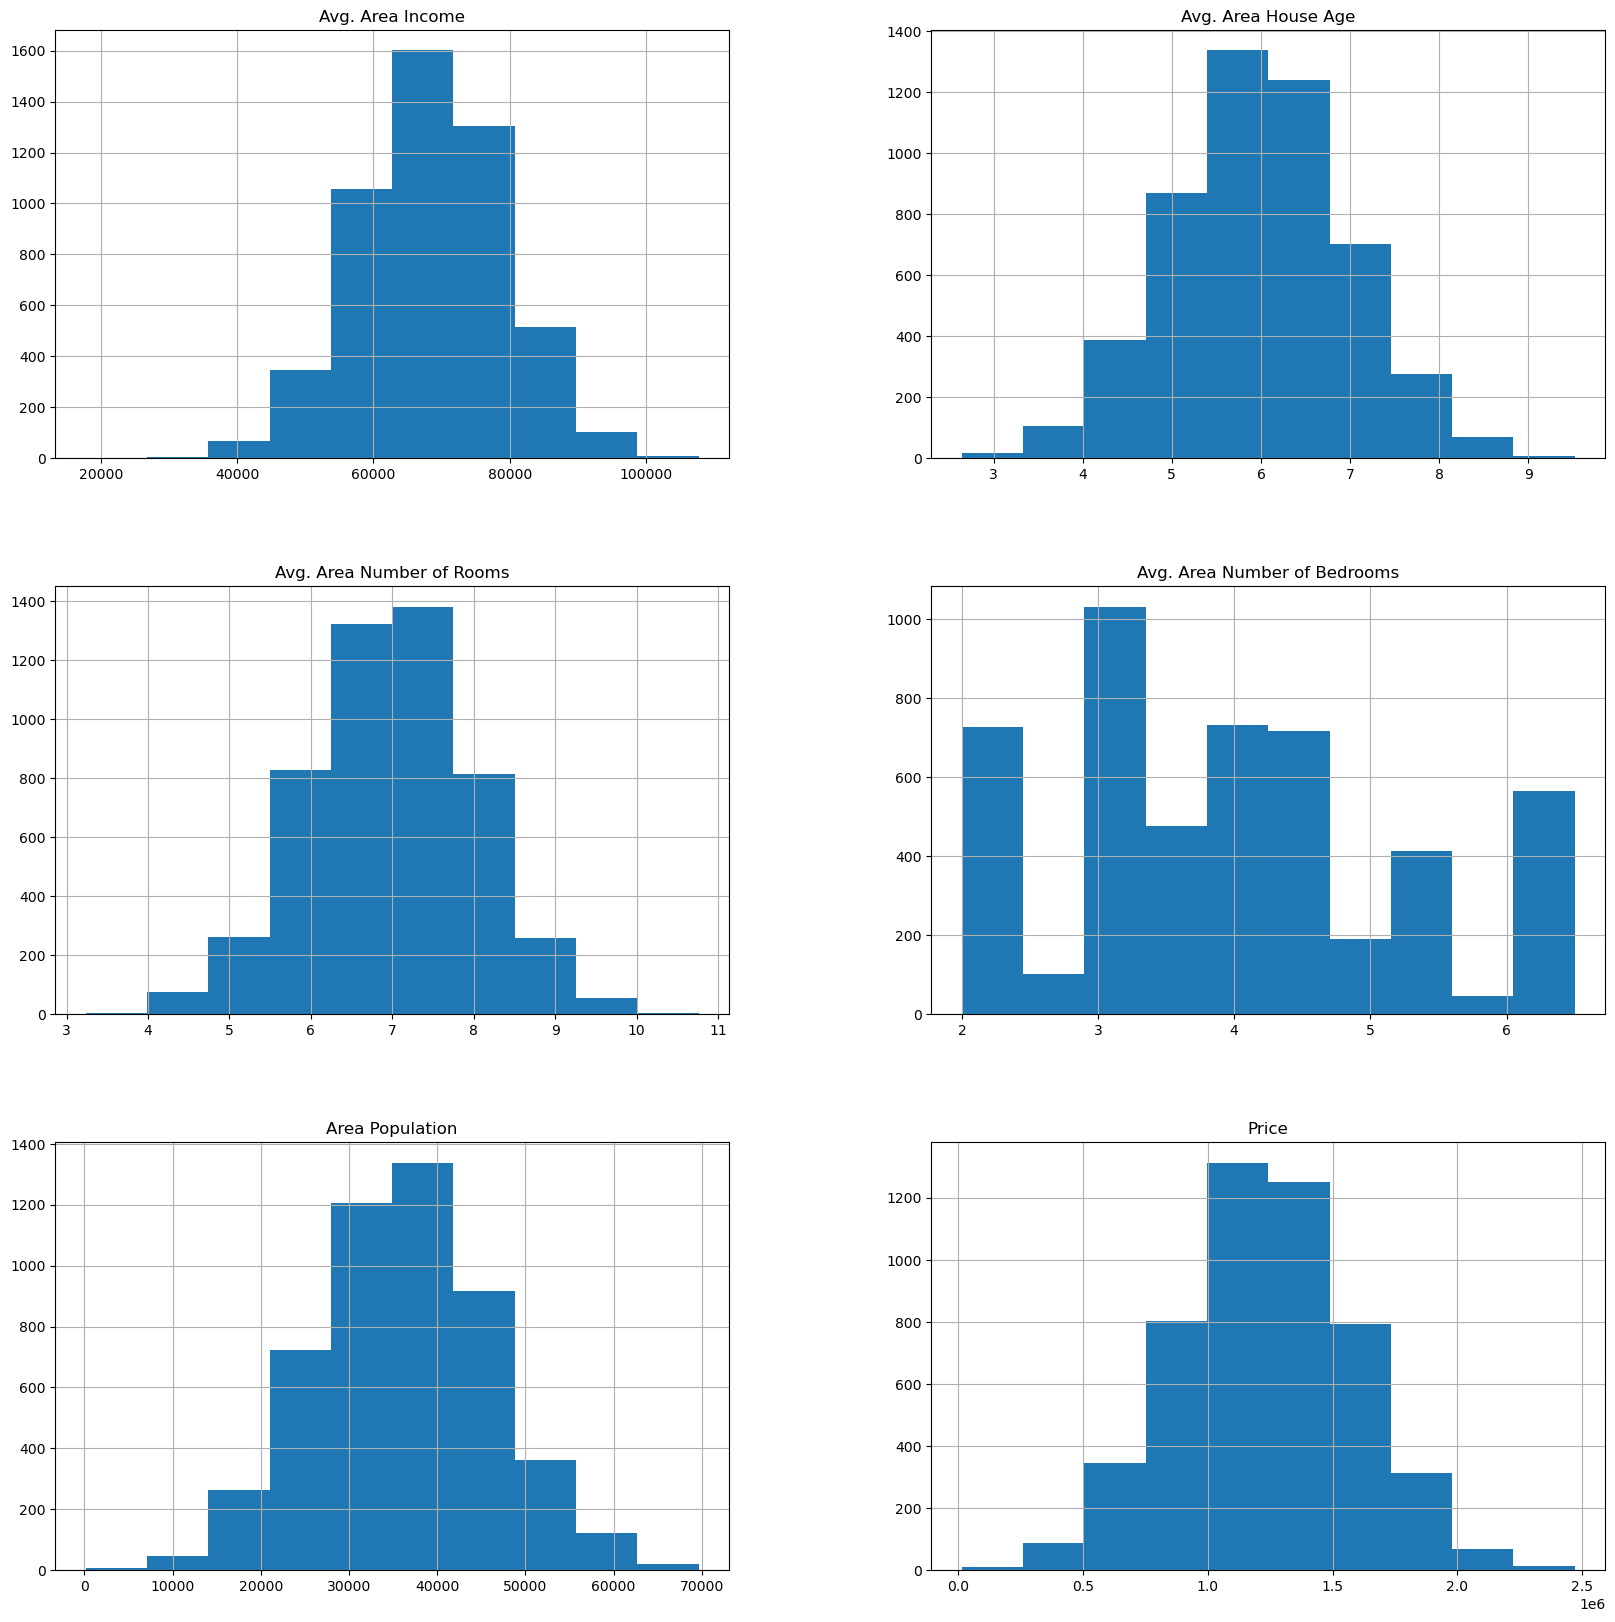

In [12]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

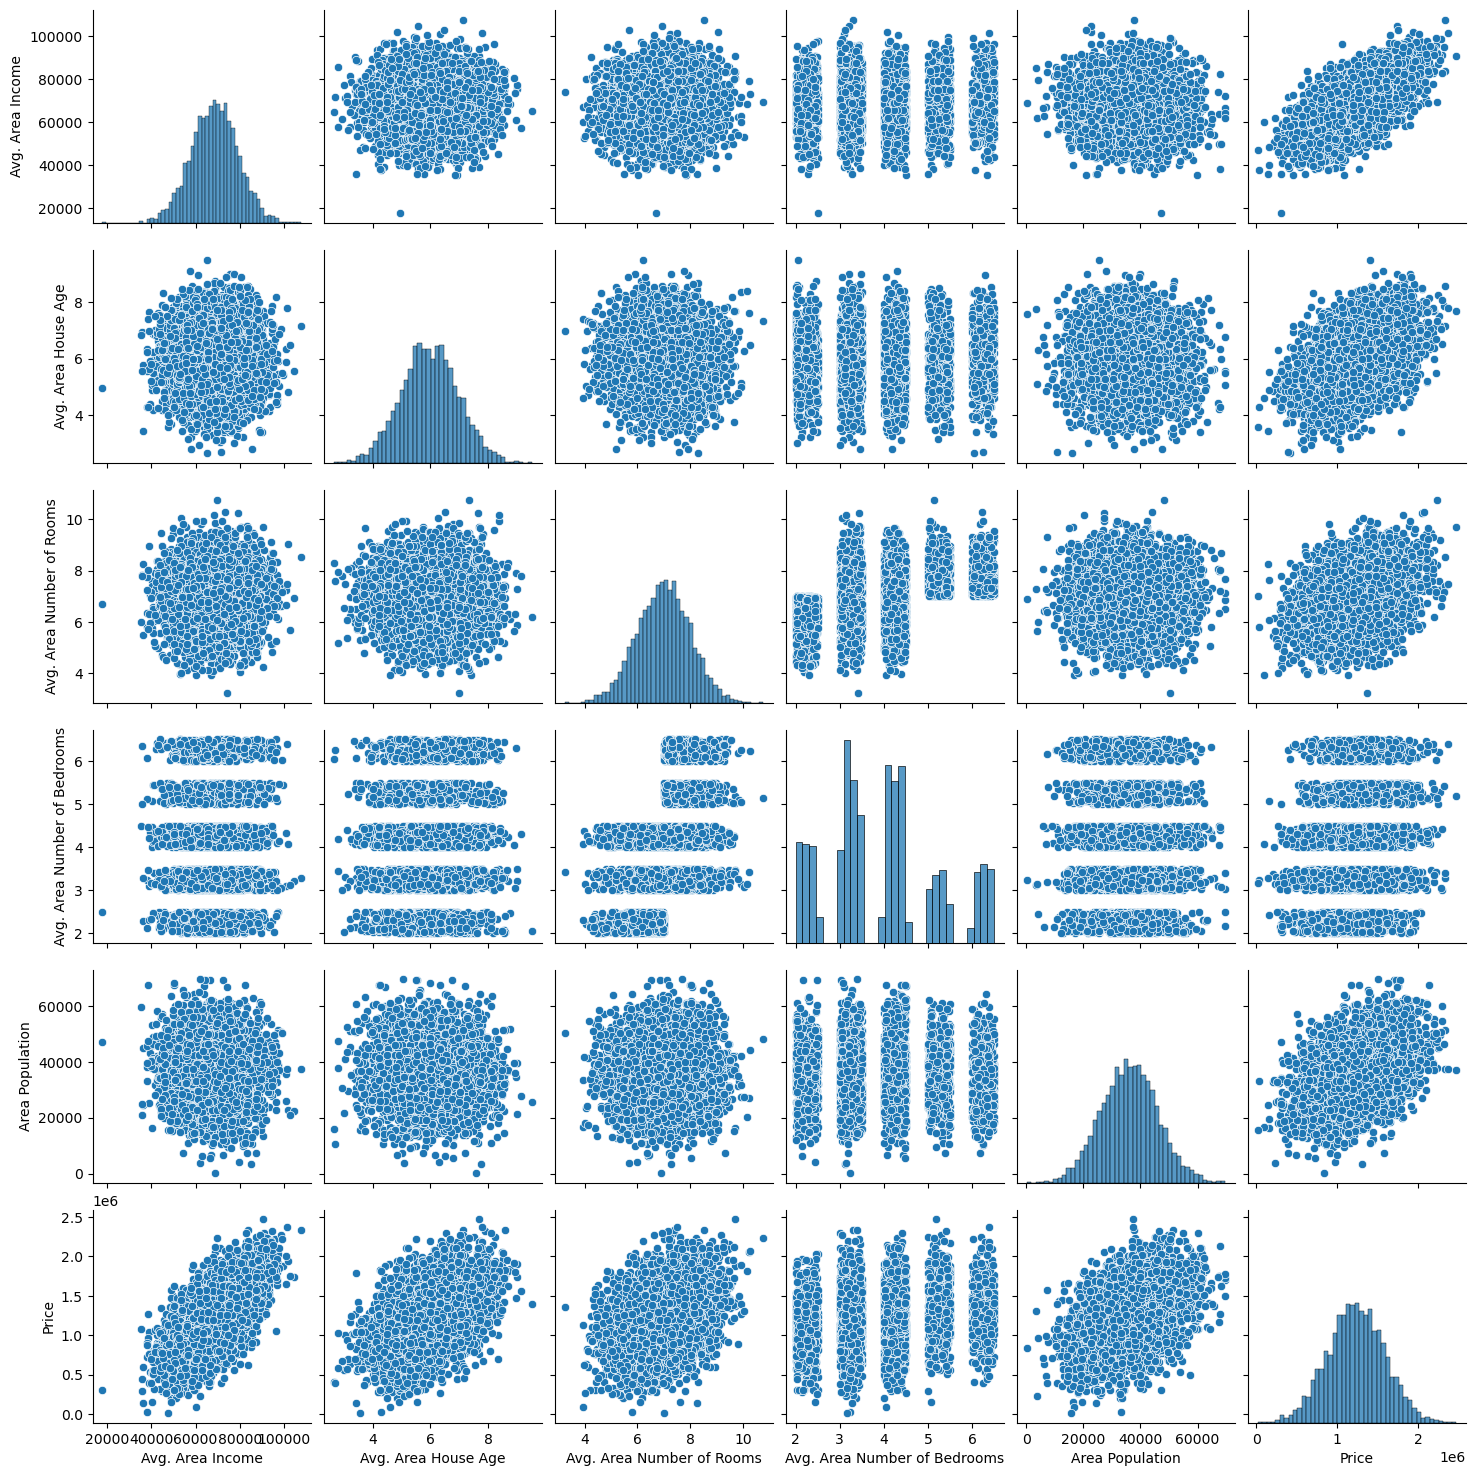

In [13]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

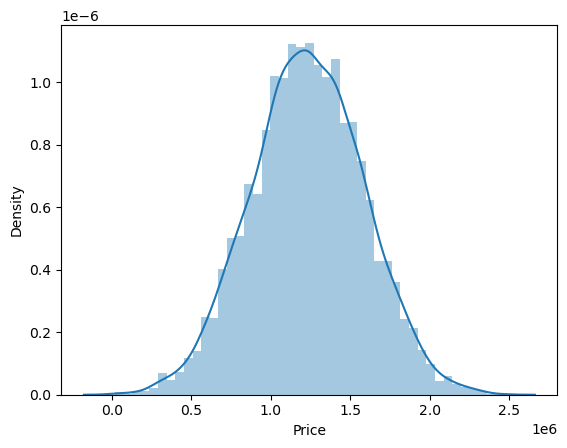

In [14]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

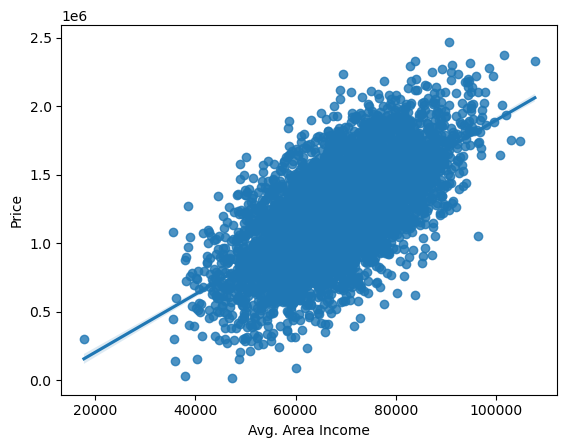

In [15]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [16]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

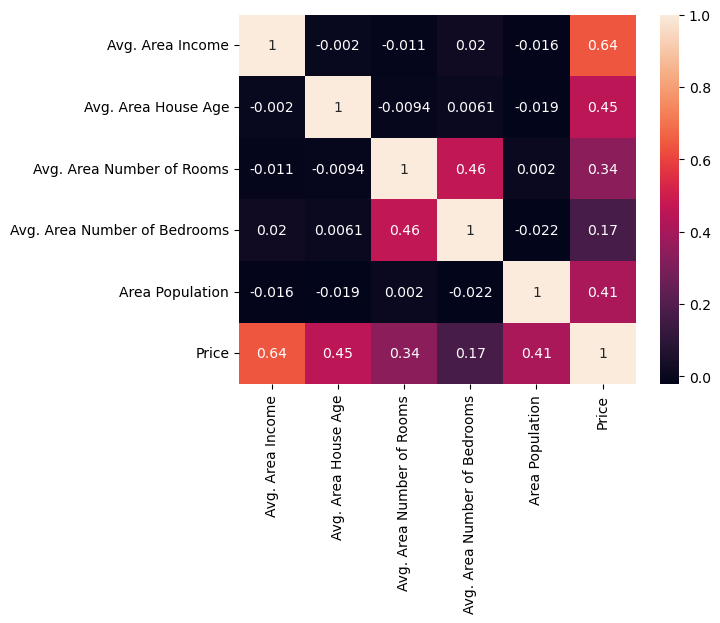

In [17]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [18]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

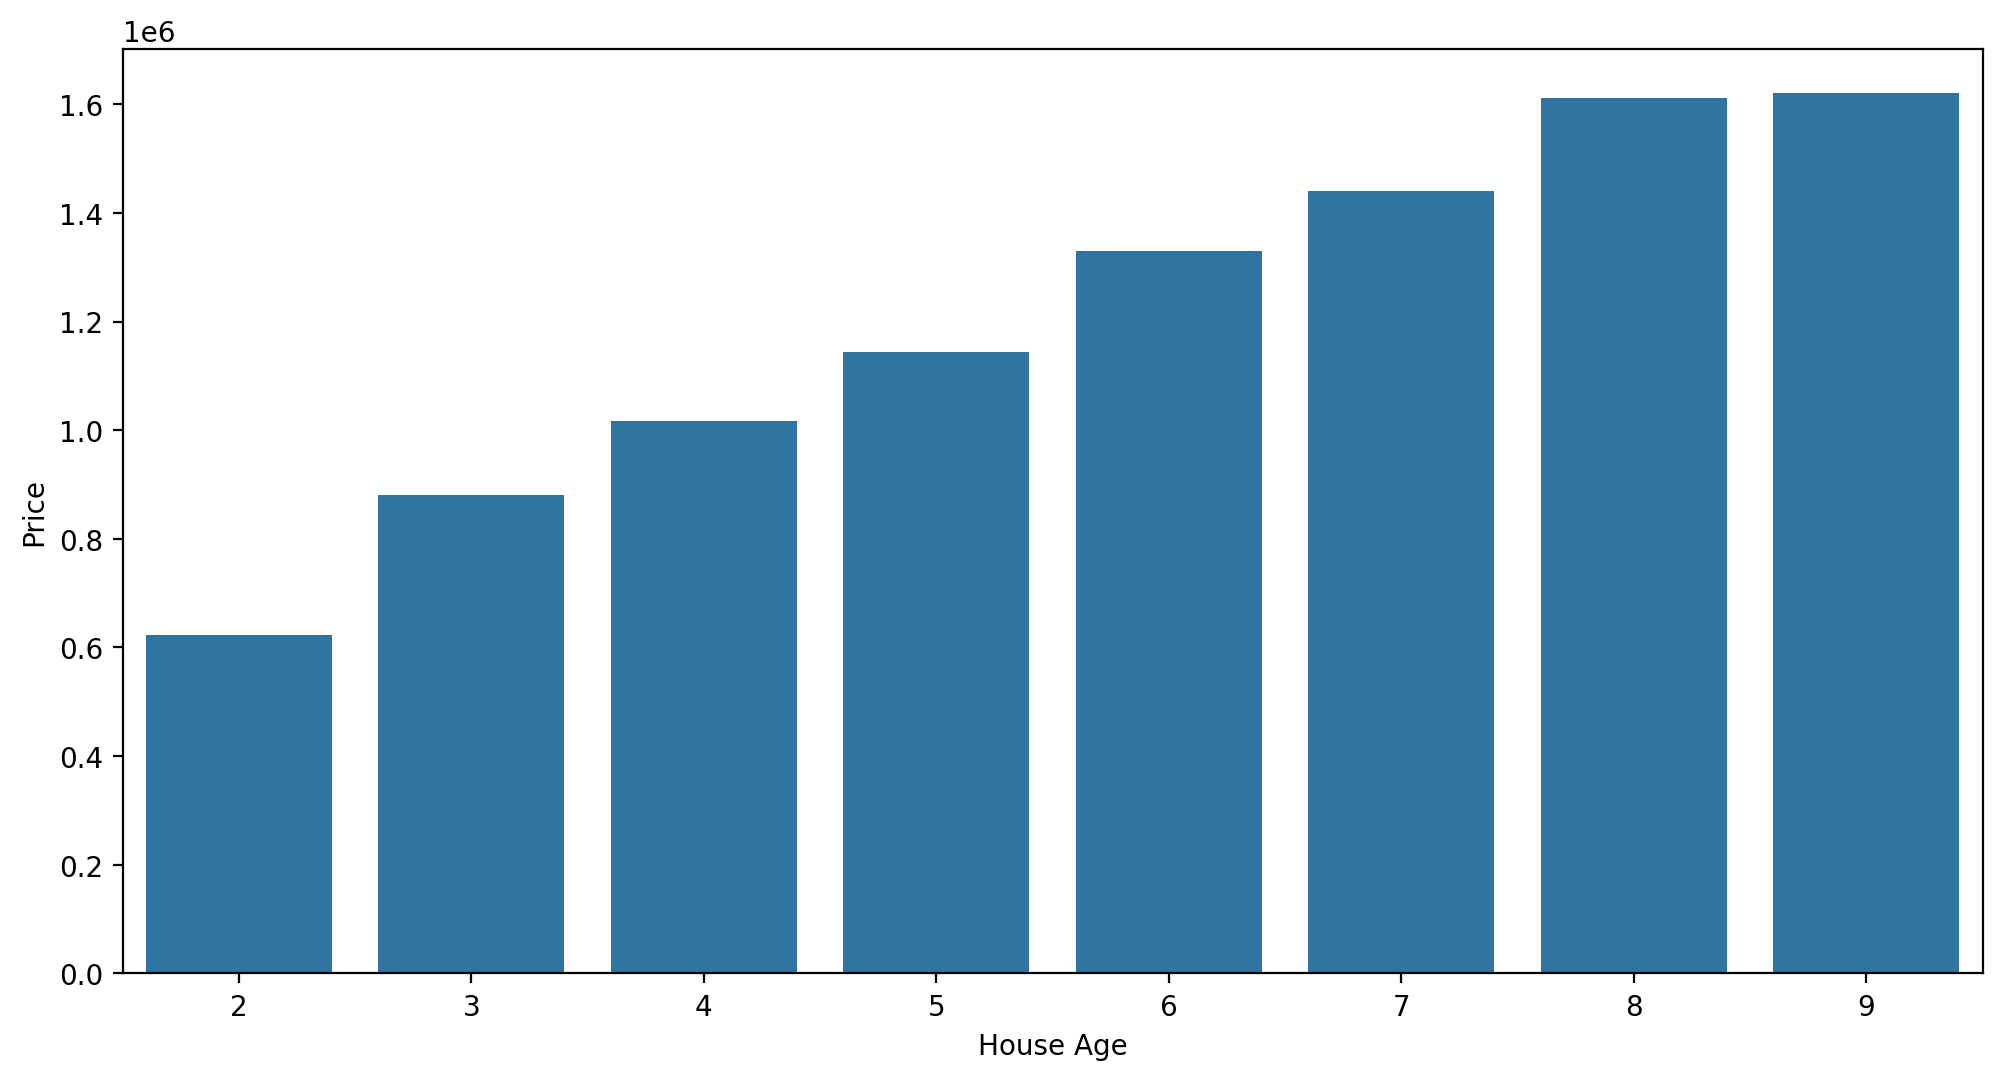

In [19]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [20]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

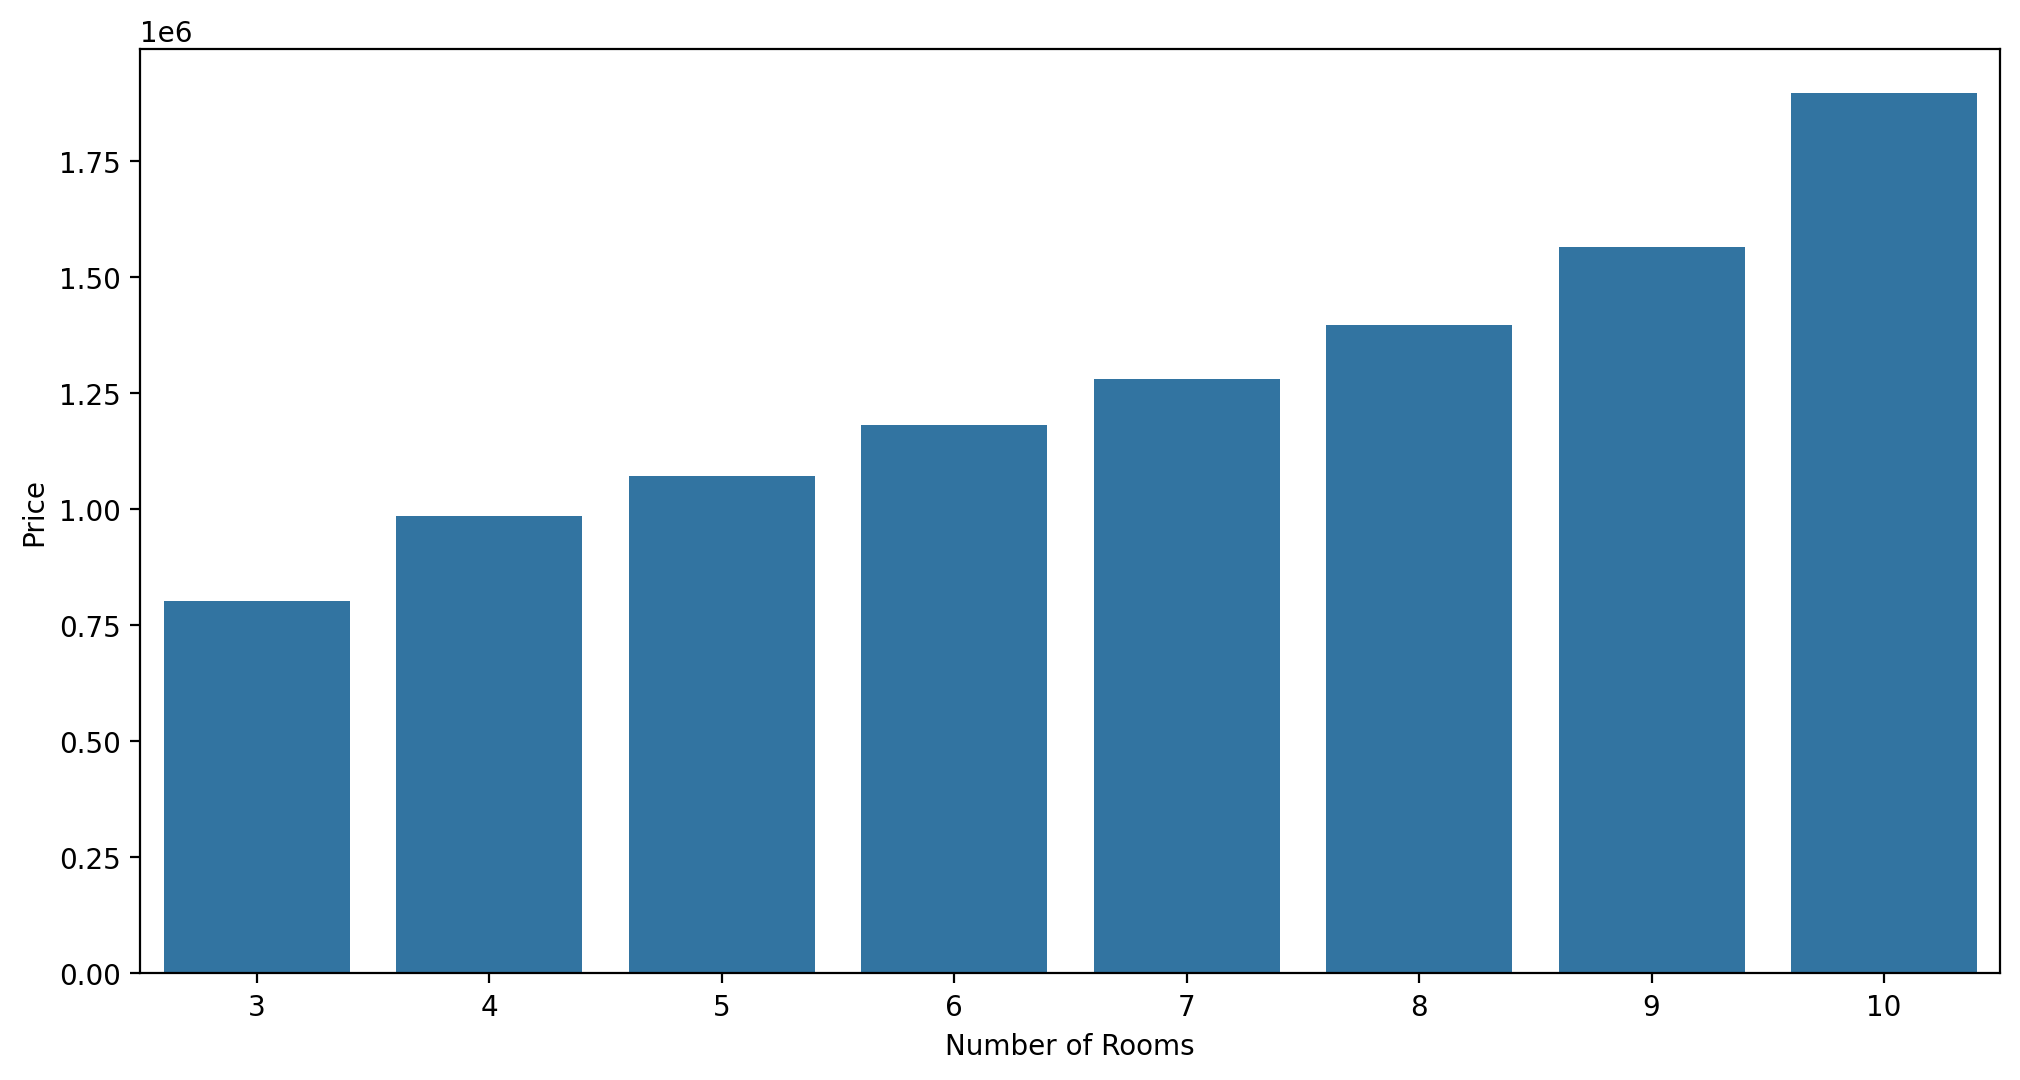

In [21]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [22]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

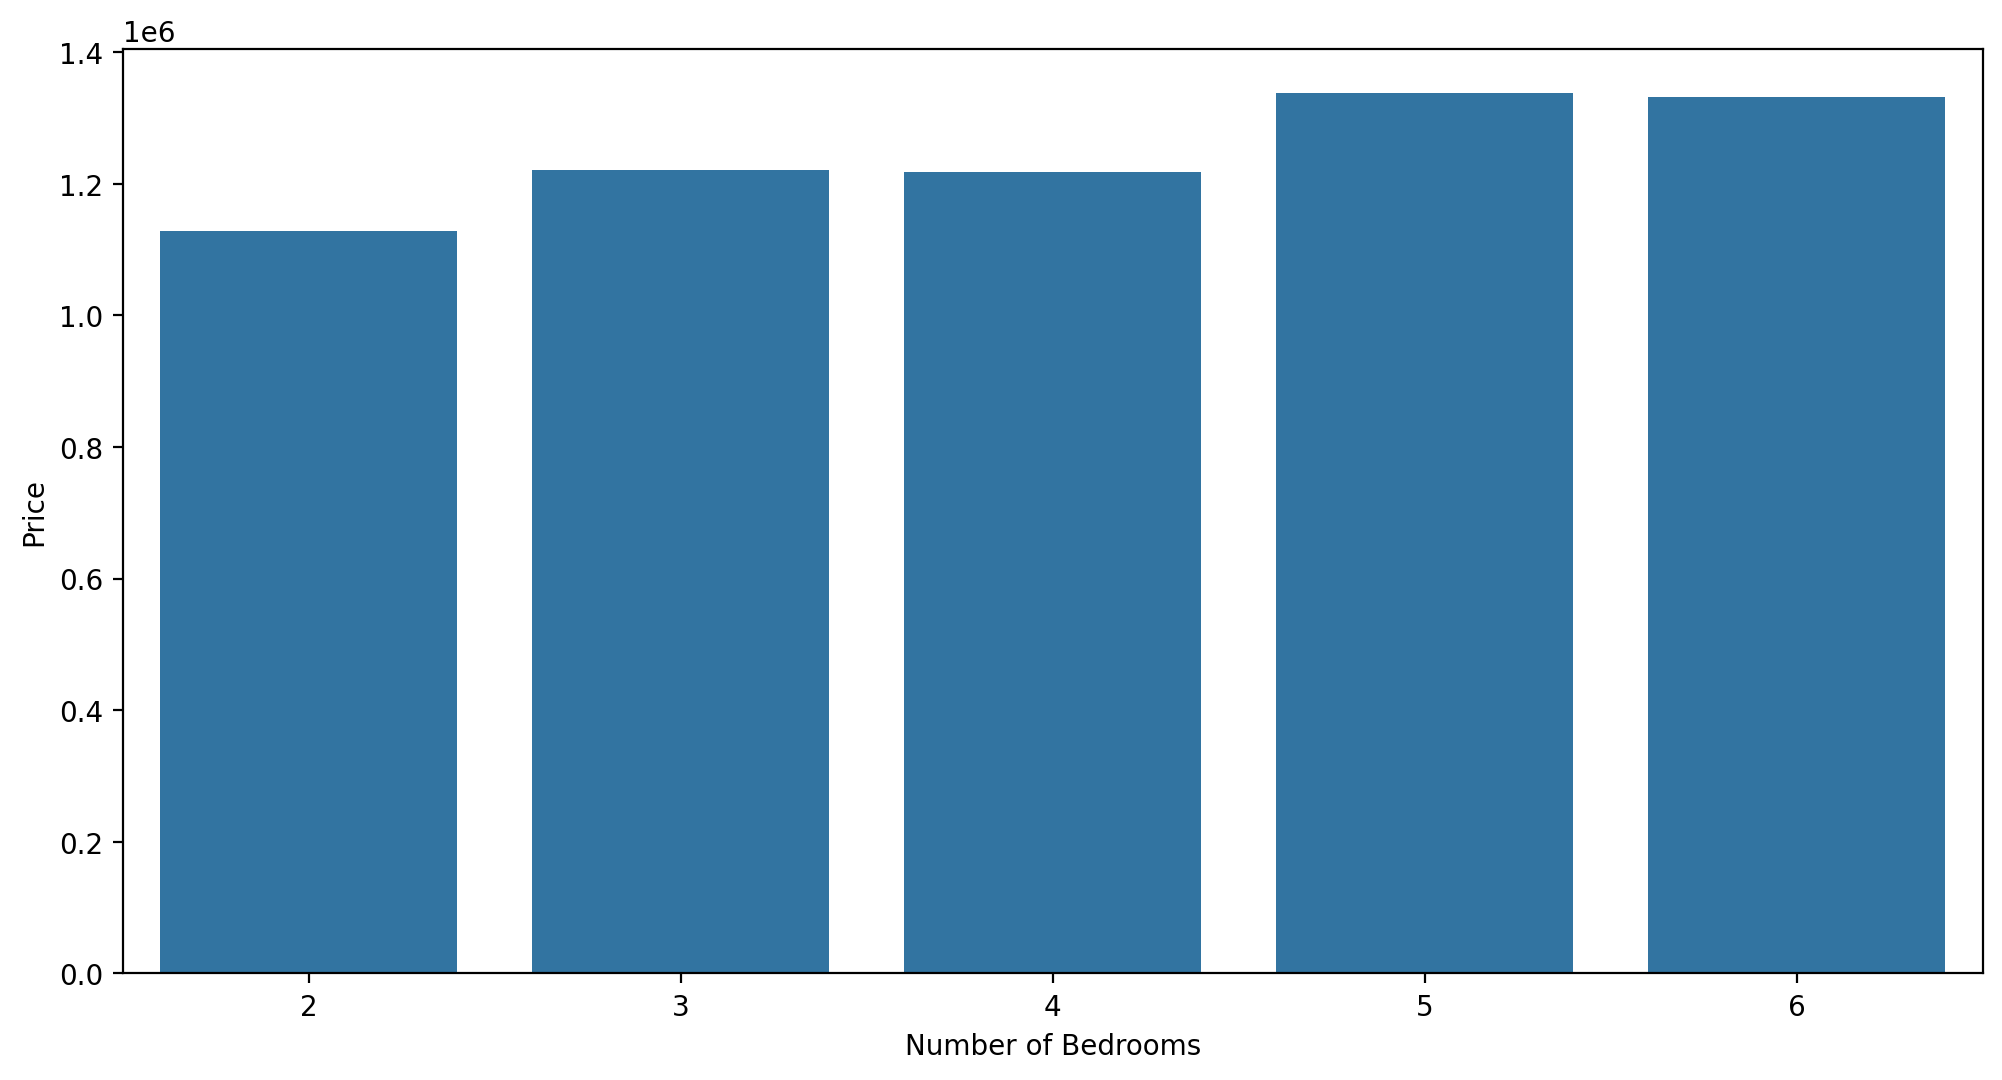

In [23]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [24]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [25]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [26]:
y = df['Price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [31]:
lrm.intercept_

-2638673.426191325

In [32]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [33]:
predictions = lrm.predict(X_test)

In [34]:
predictions

array([1308536.1359262 , 1237122.72746477, 1243835.62817066, ...,
       1457119.79297242, 1483428.9530937 , 1047510.59737176])

In [35]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

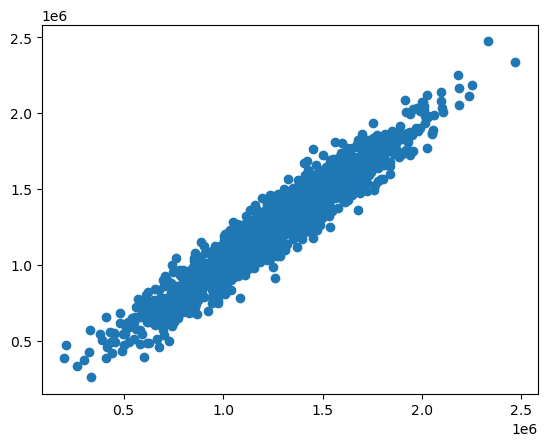

In [36]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

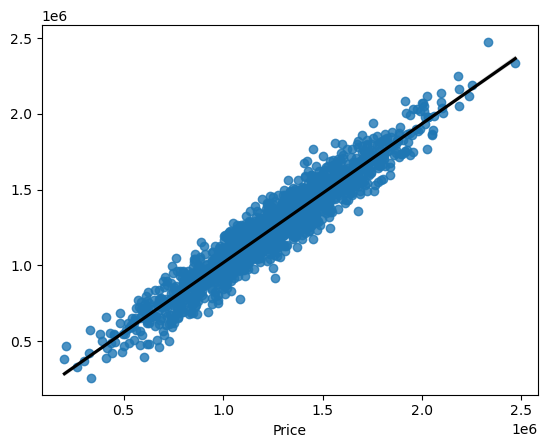

In [37]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

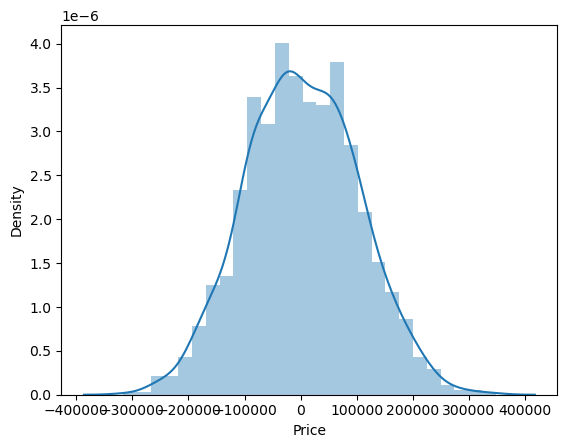

In [38]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [39]:
from sklearn import metrics

In [40]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336875

In [41]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401081

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100341.52954485537

In [43]:
metrics.r2_score(y_test, predictions)

0.9146818498753999

### Классическая модель (XGBoost)

In [44]:
from xgboost import XGBRegressor

In [45]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [46]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [47]:
xgb_predictions = xgb_model.predict(X_test)

In [48]:
print("\nXGBoost результаты:")
print(f"MAE: {mean_absolute_error(y_test, xgb_predictions)}")
print(f"MSE: {mean_squared_error(y_test, xgb_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_predictions))}")
print(f"R²: {r2_score(y_test, xgb_predictions)}")


XGBoost результаты:
MAE: 88063.79422883262
MSE: 12233085456.41484
RMSE: 110603.27959158734
R²: 0.8963388538642306


### *Вывод по XGBoost*

#### Модель хорошо себя показала и подтвердила свою эффективность для задач регрессии с табличными данными
#### Она продемонстрировала высокую предсказательную способность (89.63%)
#### Показала стабильную работу без признаков переобучения
#### Обеспечила хороший баланс между точностью и скоростью работы

### Нейронная модель

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  
])

In [52]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])

In [53]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [54]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
88/88 [==============================] - 1s 4ms/step - loss: 1635211411456.0000 - mae: 1228003.0000 - mse: 1635211411456.0000 - val_loss: 1637853429760.0000 - val_mae: 1228567.7500 - val_mse: 1637853429760.0000
Epoch 2/200
88/88 [==============================] - 0s 2ms/step - loss: 1625086623744.0000 - mae: 1224007.0000 - mse: 1625086623744.0000 - val_loss: 1603600121856.0000 - val_mae: 1215220.2500 - val_mse: 1603600121856.0000
Epoch 3/200
88/88 [==============================] - 0s 2ms/step - loss: 1492799848448.0000 - mae: 1171529.7500 - mse: 1492799848448.0000 - val_loss: 1304856363008.0000 - val_mae: 1095340.3750 - val_mse: 1304856363008.0000
Epoch 4/200
88/88 [==============================] - 0s 2ms/step - loss: 913740988416.0000 - mae: 905073.1250 - mse: 913740988416.0000 - val_loss: 461648429056.0000 - val_mae: 646261.2500 - val_mse: 461648429056.0000
Epoch 5/200
88/88 [==============================] - 0s 2ms/step - loss: 191272796160.0000 - mae: 373580.3125 - ms

In [55]:
nn_predictions = model.predict(X_test_scaled).flatten()

print("Нейронная модель:")
print(f"MAE: {mean_absolute_error(y_test, nn_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, nn_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, nn_predictions)):.2f}")
print(f"R²: {r2_score(y_test, nn_predictions):.4f}")

Нейронная модель:
MAE: 81548.34
MSE: 10187296056.18
RMSE: 100932.14
R²: 0.9137


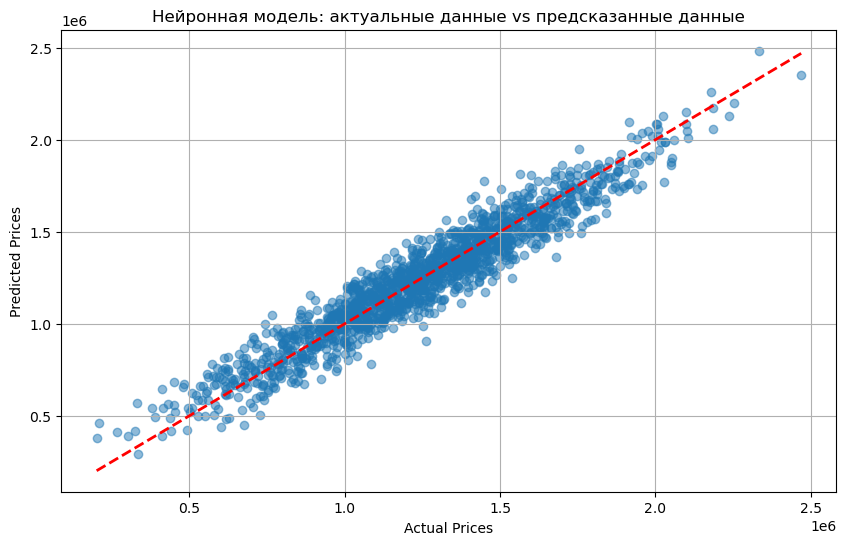

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Нейронная модель: актуальные данные vs предсказанные данные')
plt.grid(True)
plt.show()

### *Вывод по нейронной модели*

#### Нейронная сеть отлично справилась с задачей регрессии и показала наилучший результат среди всех протестированных моделей
#### Достигла максимальной точности предсказаний (91.37%)
#### Продемонстрировала способность улавливать сложные нелинейные зависимости в данных
#### Успешно избежала переобучения благодаря использованию регуляризации и ранней остановки

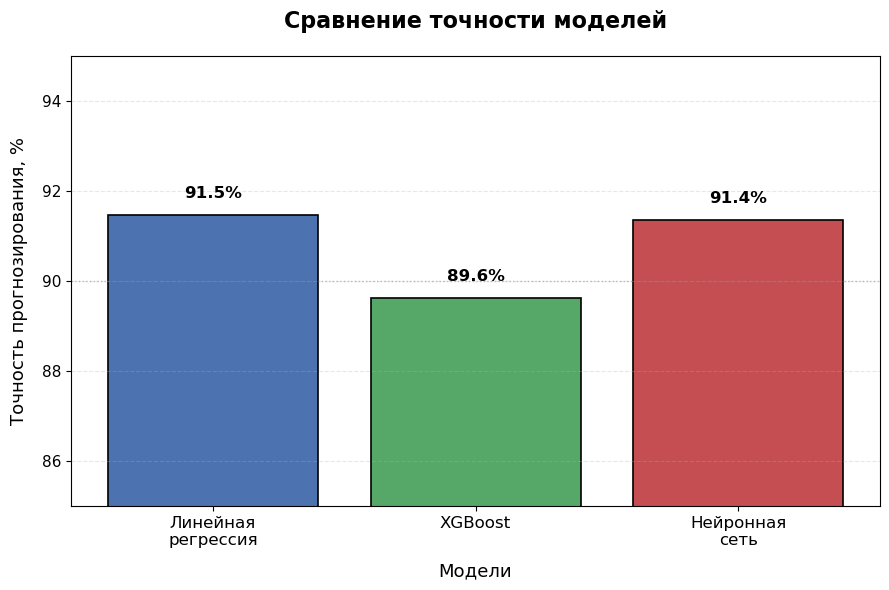

In [57]:
plt.figure(figsize=(9, 6))

# Данные
models = ['Линейная\nрегрессия', 'XGBoost', 'Нейронная\nсеть']
accuracy = [91.47, 89.63, 91.36]  # В процентах

# Цвета - более приятная палитра
colors = ['#4C72B0', '#55A868', '#C44E52']  # синий, зеленый, красный

# График
bars = plt.bar(models, accuracy, color=colors, edgecolor='black', linewidth=1.2)

# Цифры на столбцах
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{acc:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Настройки графика
plt.title('Сравнение точности моделей', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Точность прогнозирования, %', fontsize=13, labelpad=10)
plt.xlabel('Модели', fontsize=13, labelpad=10)
plt.ylim(85, 95)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Улучшаем читаемость осей
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

# Добавляем горизонтальную линию на уровне 90% для наглядности
plt.axhline(y=90, color='gray', linestyle=':', alpha=0.5, linewidth=1)

# Делаем график более плотным
plt.tight_layout()

plt.show()

### Общий вывод

#### Все три модели показывают отличные результаты (>89.5%), что свидетельствует о хорошем качестве данных и корректно выбранных признаках.
#### Минимальный разрыв между моделями (менее 2%) позволяет выбирать модель не только по точности, но и по другим критериям